### Data Challenge
#### Campaign analysis
Please analyze the data and answer the following questions:
* 1. If there were no pacing controller, how many impressions could this campaign has
delivered for each day? Have you used any assumptions beyond what have been listed?
 
* 2. There are a few days of under-delivery. What are the possible reasons?
* 3. Is the current order for targeting filters optimal? If yes, why? If no, how to improve?
What else have you noticed during your investigation?

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import csv
import pandas as pd
from pandas.compat import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Read and clean data from dat file

In [2]:
with open('counter_example.dat') as dat_file:
    lst = []
    for line in dat_file:
        key = 'date'
        row_n = [key+i for i in line.split(key) if i]
        for row_i in row_n:
            row = [field.strip(':') for field in row_i.split()]
            lst.append(row)
            
final = []
for item in lst:
    dictOfWords = {i : np.nan for i in lst[0][0:len(lst[0]):2]}
    for i in range(len(item)):
        if item[i] in dictOfWords.keys():
            dictOfWords[item[i]] = item[i+1]
    final.append(dictOfWords)
    
redo_final = pd.DataFrame(final)
redo_final= redo_final[['date',
 'target_1',
 'target_2',
 'target_3',
 'target_4',
 'target_5',
 'target_6',
 'target_7',
 'target_8',
 'target_9',
 'target_10',
 'pacing',
 'inclusion',
 'impressions']]

See the convert rate from impression to totoal inclusion

In [3]:
redo_final = redo_final.astype('float')
redo_final['percentage'] = redo_final['impressions']/redo_final['inclusion']
redo_final.describe()

,date,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,pacing,inclusion,impressions,percentage
count,100.000000,1.000000e+02,9.900000e+01,9.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000
mean,50.500000,2.988342e+08,4.464940e+08,1.963475e+08,1.915137e+07,1.994167e+19,1.150535e+07,1.075037e+06,2.462855e+06,88444.390000,63968.780000,111581.910000,11373.540000,935.770000,0.097120
std,29.011492,3.313477e+07,4.899224e+07,2.308466e+07,2.369428e+06,1.994167e+20,1.457365e+06,1.443748e+05,4.115198e+05,18855.199868,13561.697626,30613.450997,12427.940004,235.676025,0.016800
min,1.000000,2.999142e+07,4.269161e+07,1.983410e+07,2.035918e+06,2.175740e+06,1.180537e+06,1.147770e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199
25%,25.750000,2.849094e+08,4.254488e+08,1.866146e+08,1.810310e+07,1.932512e+07,1.086868e+07,1.000781e+06,2.334975e+06,79353.750000,57180.000000,100435.250000,9782.250000,1000.000000,0.097447
50%,50.500000,3.031009e+08,4.547949e+08,1.988030e+08,1.920948e+07,2.055973e+07,1.171316e+07,1.085590e+06,2.520572e+06,90682.000000,65015.000000,116815.500000,9962.500000,1000.000000,0.099980
75%,75.250000,3.176842e+08,4.740765e+08,2.093522e+08,2.045906e+07,2.178640e+07,1.234862e+07,1.164900e+06,2.684456e+06,100552.750000,72255.000000,128972.750000,10230.000000,1000.000000,0.101916
max,100.000000,3.325171e+08,4.972971e+08,2.241554e+08,2.343538e+07,1.994167e+21,1.392557e+07,1.293199e+06,3.001747e+06,124433.000000,91216.000000,165395.000000,98255.000000,1000.000000,0.104987


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


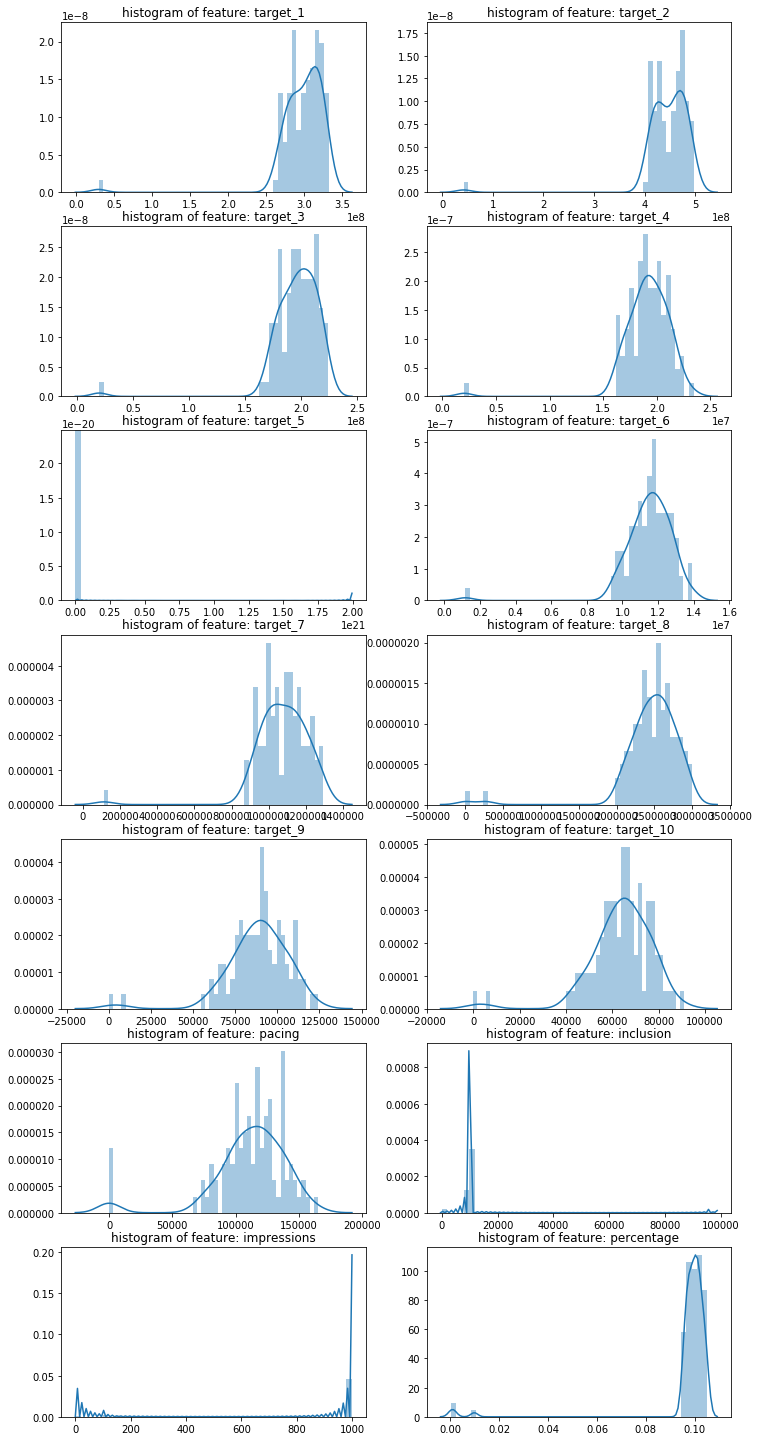

In [4]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(30, 2)
for i, cn in enumerate(redo_final.iloc[:,1:]):
    ax = plt.subplot(gs[i])
    sns.distplot(redo_final[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [5]:
redo_final[redo_final['target_5']>10e10]

,date,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,pacing,inclusion,impressions,percentage
67,68.0,279809607.0,414368256.0,189160809.0,18721786.0,1.994167e+21,11717809.0,1010240.0,2357332.0,100813.0,72240.0,127560.0,9565.0,1000.0,0.104548


Check under deliver days and investigate on the reasons

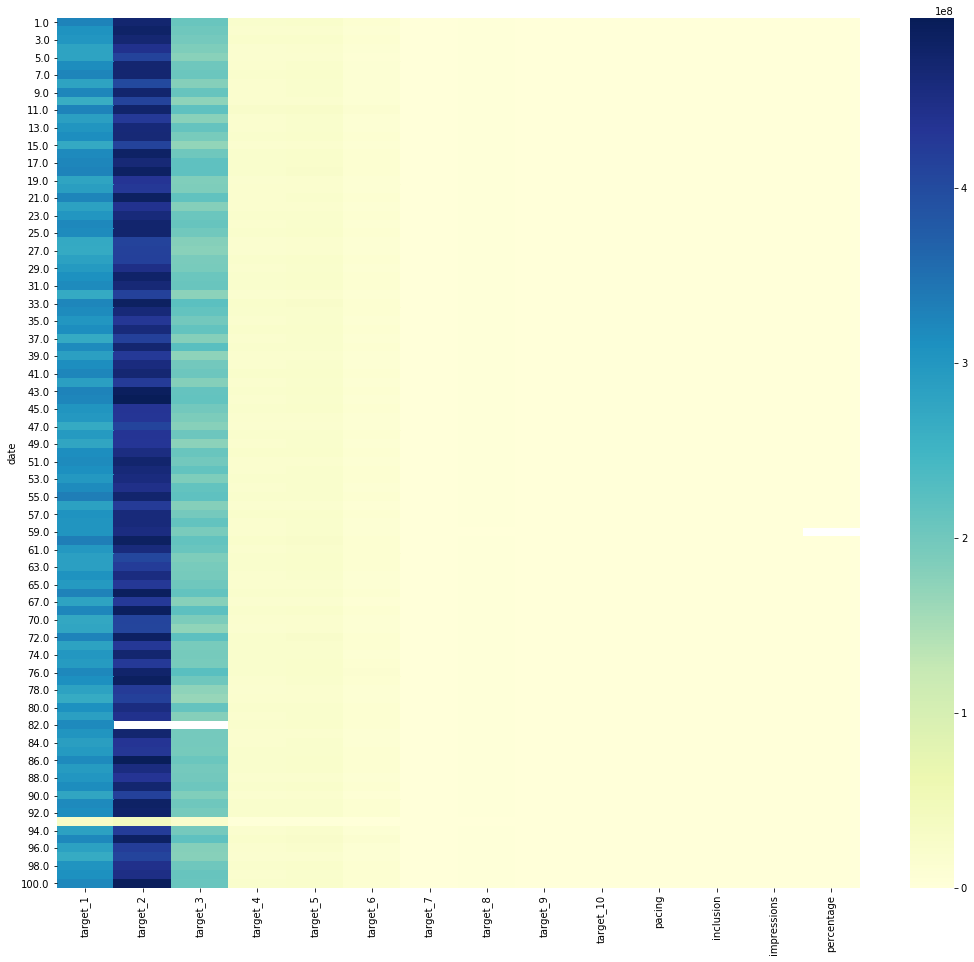

In [6]:
plot_i = redo_final[redo_final['target_5']<10e10].set_index('date')
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(plot_i, ax=ax,cmap="YlGnBu")

### Visualize unreasonable

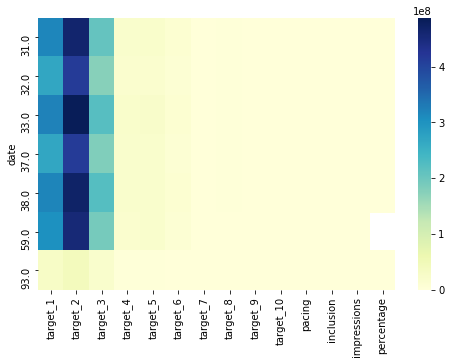

In [7]:
plot_i = redo_final[(redo_final['impressions']<1000)&(redo_final['target_5']<10e10)].set_index('date')
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(plot_i, ax=ax,cmap="YlGnBu")

* day 31: possible reason typo;not highest bid
* day 32/33: pacing too much
* day 37/38: pacing down makes too many inclusions possibly overload the impressions;
* day 58: target 8 problem or excluded by targets before it
* day 93: total volumn 10% lower than the other days. pacing = 0 possible reasons could be possible that did not pace and data volumn too low

In [8]:
redo_final[redo_final['percentage']>0.08]['percentage'].median()

0.10022566470132953

In [9]:
redo_final = redo_final[redo_final.target_5<10e10]

In [10]:
for i in range(1,11):
    percentage = redo_final.iloc[:,i]/redo_final.iloc[0:,i:13].sum(axis = 1,skipna = True)
    name = 'target_'+str(i)+'_rate'
    redo_final[name] = percentage

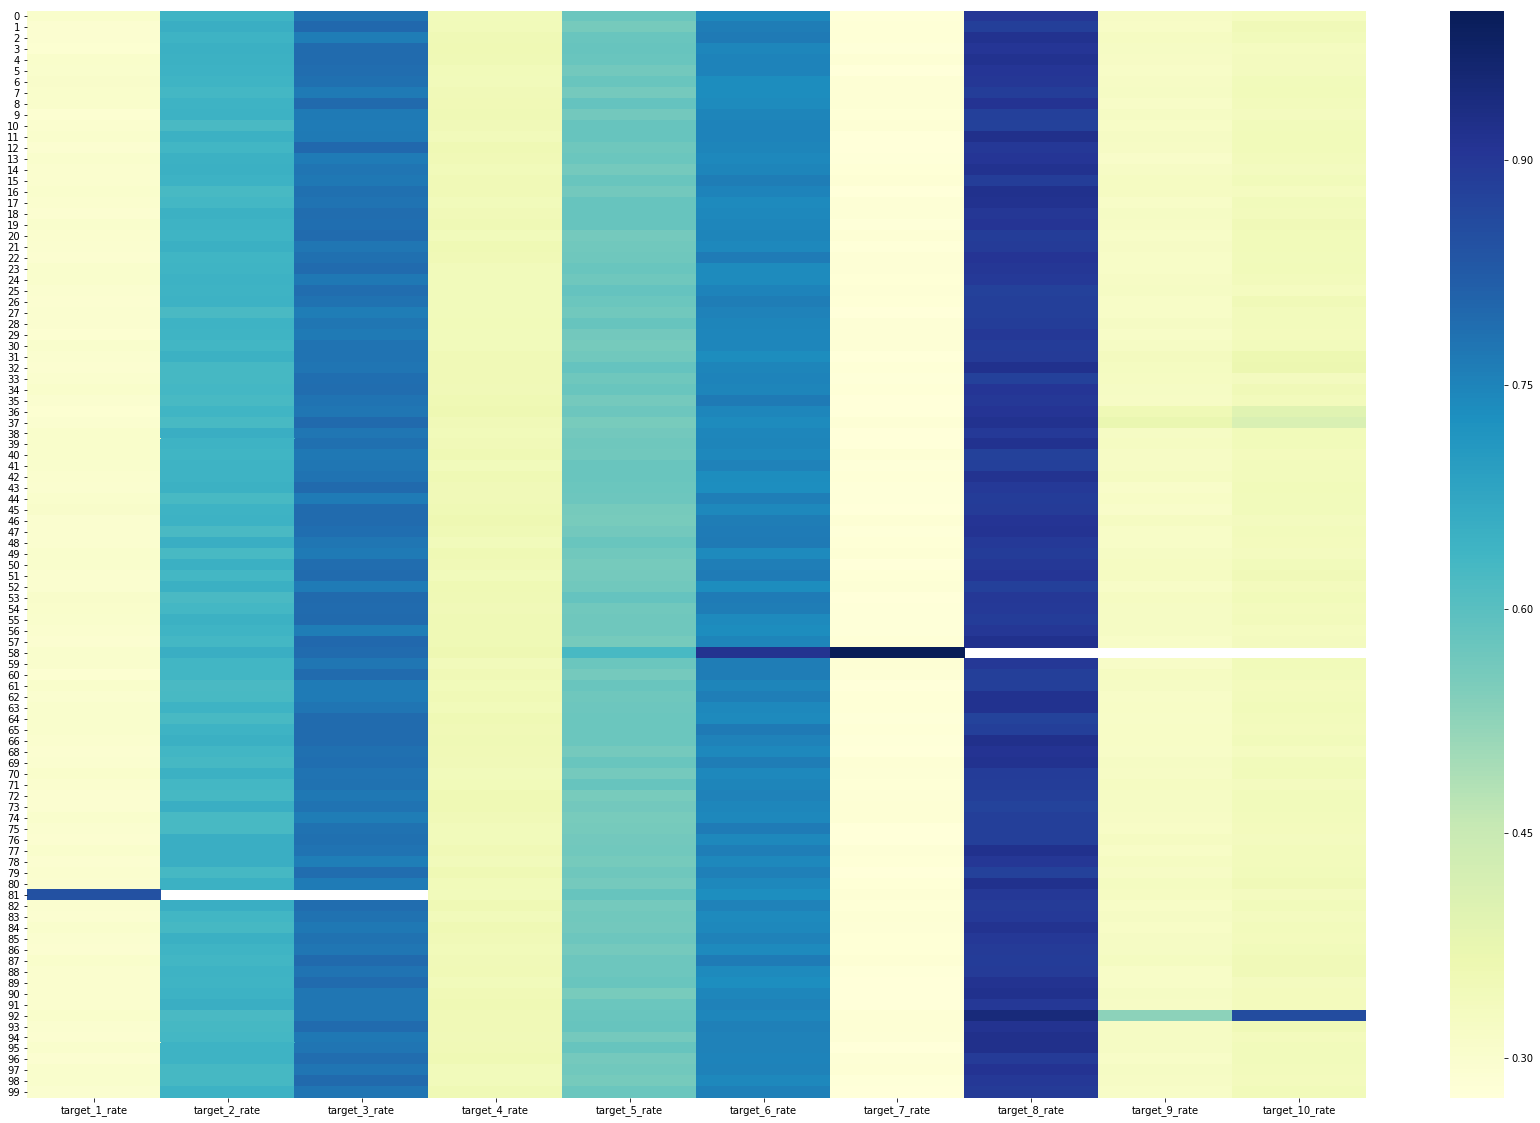

In [11]:
plot_i = redo_final.iloc[:,-10:]
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(plot_i, ax=ax,cmap="YlGnBu")

In [12]:
redo_final.iloc[:,-10:].mean().\
            reset_index().rename({0:'mean_rate'},axis = 1).\
                sort_values('mean_rate',ascending = False)

,index,mean_rate
7,target_8_rate,0.900096
2,target_3_rate,0.781807
5,target_6_rate,0.751318
1,target_2_rate,0.640116
4,target_5_rate,0.570574
3,target_4_rate,0.349540
9,target_10_rate,0.347551
8,target_9_rate,0.323263
0,target_1_rate,0.305316
6,target_7_rate,0.287317
